# Treemapping procedure

In this notebook, every gene-expression vector **g<sub>i</sub>** is transformed into a gene-expression image **R<sub>i</sub>**. However, as opposed to `2-KEGG_BRITE_Treemap`, in this notebook, genes have been rearranged in a completely random order, so that each resulting image **R<sub>i</sub>** lacks any local information that CNNs could exploit. This is the only difference between the workflow presented in this notebook and the pipeline carried out in the previously referenced notebook.

For each image **R<sub>i</sub>**, we use the same resolution used in `2-KEGG_BRITE_Treemap` notebook.

Firstly, we load the KEGG Brite hierarchical dataset generated in `1-KEGG_BRITE_Hierarchy` Python notebook:

In [1]:
start.time <- Sys.time()
exp_to_tree_map <- read.csv("../KEGG_exp_to_tree_map.csv", header = TRUE, stringsAsFactors = FALSE)
end.time <- Sys.time()

In [2]:
end.time - start.time

Time difference of 1.177731 mins

In [3]:
# Number of ENSEMBLE genes included in the dataset
length(unique(exp_to_tree_map$geneId))

[1] 7509

In [4]:
head(exp_to_tree_map)

ERROR while rich displaying an object: Error in sprintf(wrap, caption, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]]

geneId,geneName,keggId,keggBriteId,Functional.Annotation.Group,Functional.Annotation.Subgroup,Functional.Annotation,TCGA.02.0047.01,TCGA.02.0055.01,TCGA.02.2483.01,⋯,TCGA.ZS.A9CE.01,TCGA.ZS.A9CF.01,TCGA.ZS.A9CF.02,TCGA.ZS.A9CG.01,TCGA.ZT.A8OM.01,TCGA.ZU.A8S4.01,TCGA.ZU.A8S4.11,TCGA.ZX.AA5X.01,tamPixel,order
<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000187961.13,KLHL17,hsa:339451,1,Genes and Proteins,Orthologs and modules,KEGG Orthology (KO),1.3225,2.3135,2.5707,⋯,0.8883,1.7532,0.7664,0.2998,1.9226,2.7336,-0.3752,2.7972,1,1.992469
ENSG00000187961.13,KLHL17,hsa:339451,4121,Genes and Proteins,Protein families: genetic information processing,Ubiquitin system,1.3225,2.3135,2.5707,⋯,0.8883,1.7532,0.7664,0.2998,1.9226,2.7336,-0.3752,2.7972,1,1.992469
ENSG00000188290.10,HES4,hsa:57801,1,Genes and Proteins,Orthologs and modules,KEGG Orthology (KO),4.1604,3.6148,3.8729,⋯,-0.3201,0.9642,-0.8084,0.2762,5.8595,3.9156,-0.1504,4.3751,1,2.791702
ENSG00000188290.10,HES4,hsa:57801,3000,Genes and Proteins,Protein families: genetic information processing,Transcription factors,4.1604,3.6148,3.8729,⋯,-0.3201,0.9642,-0.8084,0.2762,5.8595,3.9156,-0.1504,4.3751,1,2.791702
ENSG00000187608.8,ISG15,hsa:9636,1,Genes and Proteins,Orthologs and modules,KEGG Orthology (KO),5.8166,6.9599,5.9072,⋯,6.4074,6.1183,5.0592,5.2122,7.4520,6.6671,4.7783,9.7576,1,6.491173
ENSG00000187608.8,ISG15,hsa:9636,4121,Genes and Proteins,Protein families: genetic information processing,Ubiquitin system,5.8166,6.9599,5.9072,⋯,6.4074,6.1183,5.0592,5.2122,7.4520,6.6671,4.7783,9.7576,1,6.491173


## Template image

As we are going to perform a treemapping procedure based on random sorting criterion, we remove all the KEGG BRITE hierarchy from the `exp_to_tree_map` dataset, only keeping the `geneId` level:

In [5]:
exp_to_tree_map <- exp_to_tree_map[, -c(2:7)]
head(exp_to_tree_map)

ERROR while rich displaying an object: Error in sprintf(wrap, caption, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]]

geneId,TCGA.02.0047.01,TCGA.02.0055.01,TCGA.02.2483.01,TCGA.02.2485.01,TCGA.04.1331.01,TCGA.04.1332.01,TCGA.04.1337.01,TCGA.04.1338.01,TCGA.04.1341.01,⋯,TCGA.ZS.A9CE.01,TCGA.ZS.A9CF.01,TCGA.ZS.A9CF.02,TCGA.ZS.A9CG.01,TCGA.ZT.A8OM.01,TCGA.ZU.A8S4.01,TCGA.ZU.A8S4.11,TCGA.ZX.AA5X.01,tamPixel,order
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000187961.13,1.3225,2.3135,2.5707,3.3814,2.0500,2.2990,3.5086,0.7664,1.5514,⋯,0.8883,1.7532,0.7664,0.2998,1.9226,2.7336,-0.3752,2.7972,1,1.992469
ENSG00000187961.13,1.3225,2.3135,2.5707,3.3814,2.0500,2.2990,3.5086,0.7664,1.5514,⋯,0.8883,1.7532,0.7664,0.2998,1.9226,2.7336,-0.3752,2.7972,1,1.992469
ENSG00000188290.10,4.1604,3.6148,3.8729,5.8875,4.7661,3.9645,5.9463,3.3235,4.4490,⋯,-0.3201,0.9642,-0.8084,0.2762,5.8595,3.9156,-0.1504,4.3751,1,2.791702
ENSG00000188290.10,4.1604,3.6148,3.8729,5.8875,4.7661,3.9645,5.9463,3.3235,4.4490,⋯,-0.3201,0.9642,-0.8084,0.2762,5.8595,3.9156,-0.1504,4.3751,1,2.791702
ENSG00000187608.8,5.8166,6.9599,5.9072,9.9433,8.6119,7.5186,6.1985,4.6206,8.2873,⋯,6.4074,6.1183,5.0592,5.2122,7.4520,6.6671,4.7783,9.7576,1,6.491173
ENSG00000187608.8,5.8166,6.9599,5.9072,9.9433,8.6119,7.5186,6.1985,4.6206,8.2873,⋯,6.4074,6.1183,5.0592,5.2122,7.4520,6.6671,4.7783,9.7576,1,6.491173


In [6]:
dim(exp_to_tree_map)

[1] 18494 10538

We remove all the duplicated rows:

In [7]:
exp_to_tree_map <- exp_to_tree_map[!duplicated(exp_to_tree_map$geneId), ]
dim(exp_to_tree_map)

[1]  7509 10538

### Genes to colours

We create a treemap in which every color maps to a distinct gene.

In [8]:
gene <- exp_to_tree_map$geneId
length(gene)

[1] 7509

We first generate a set of 65536 RGB colors:

In [9]:
start.time <- Sys.time()
col_rgb <- character()
for (i in 0:255) {
  for (j in 0:255) {
    col_rgb <- append(col_rgb, rgb(red=i, green=j, blue=j, maxColorValue=255))
  }
}
end.time <- Sys.time()

In [10]:
end.time - start.time

Time difference of 11.46692 secs

In [11]:
length(col_rgb)

[1] 65536

From the complete set of colours, we select a subset of 7509 colors, in order to associate one distinct color to every gene:

In [12]:
gene_color <- data.frame(color = col_rgb[seq(from=1, to=length(col_rgb), 
                by=as.integer(length(col_rgb)/length(gene)))][1:length(gene)], stringsAsFactors = FALSE)

In [13]:
nrow(gene_color)

[1] 7509

In [14]:
rownames(gene_color) <- gene

In [15]:
# Background color, e.g. #FFFFFF, used later to generate the PNG image, 
# can not be contained in the set of colors
tail(gene_color)

,color
,<chr>
ENSG00000012817.15,#EA7878
ENSG00000198692.9,#EA8080
ENSG00000105227.14,#EA8888
ENSG00000164237.8,#EA9090
ENSG00000175048.16,#EA9898
ENSG00000188706.12,#EAA0A0


We create a new column in the `exp_to_tree_map` dataset that specifies the colors to which genes are associated:

In [16]:
exp_to_tree_map["colorGene"] <- gene_color[exp_to_tree_map$geneId, "color"]

In [17]:
head(exp_to_tree_map)

ERROR while rich displaying an object: Error in sprintf(wrap, caption, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]]

,geneId,TCGA.02.0047.01,TCGA.02.0055.01,TCGA.02.2483.01,TCGA.02.2485.01,TCGA.04.1331.01,TCGA.04.1332.01,TCGA.04.1337.01,TCGA.04.1338.01,TCGA.04.1341.01,⋯,TCGA.ZS.A9CF.01,TCGA.ZS.A9CF.02,TCGA.ZS.A9CG.01,TCGA.ZT.A8OM.01,TCGA.ZU.A8S4.01,TCGA.ZU.A8S4.11,TCGA.ZX.AA5X.01,tamPixel,order,colorGene
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,ENSG00000187961.13,1.3225,2.3135,2.5707,3.3814,2.0500,2.2990,3.5086,0.7664,1.5514,⋯,1.7532,0.7664,0.2998,1.9226,2.7336,-0.3752,2.7972,1,1.992469,#000000
3,ENSG00000188290.10,4.1604,3.6148,3.8729,5.8875,4.7661,3.9645,5.9463,3.3235,4.4490,⋯,0.9642,-0.8084,0.2762,5.8595,3.9156,-0.1504,4.3751,1,2.791702,#000808
5,ENSG00000187608.8,5.8166,6.9599,5.9072,9.9433,8.6119,7.5186,6.1985,4.6206,8.2873,⋯,6.1183,5.0592,5.2122,7.4520,6.6671,4.7783,9.7576,1,6.491173,#001010
7,ENSG00000188157.13,6.3983,4.3356,6.3946,6.2132,6.6414,7.8886,8.1206,5.6453,6.0032,⋯,4.7104,3.4945,3.0234,4.7756,6.2132,2.5263,7.1030,1,5.739239,#001818
9,ENSG00000186891.13,-1.9942,2.9281,-1.9379,-0.8599,-1.6850,-0.7108,2.0844,-0.0574,0.0440,⋯,-0.0574,-0.1993,-1.4699,1.7828,1.2209,-2.3884,2.7422,1,1.166822,#002020
12,ENSG00000186827.10,0.7493,1.5266,2.2813,1.3051,1.3846,0.8883,2.6984,1.0363,0.5470,⋯,2.2813,1.5266,1.6740,3.0757,2.6418,-2.1779,2.3508,1,1.538701,#002828


We change the `order` column to sort the genes inside the treemap in a random way:

In [18]:
rand_seed <- 69
set.seed(rand_seed)
exp_to_tree_map <- cbind(exp_to_tree_map, ranOrder = sample(nrow(exp_to_tree_map)))

In [19]:
length(unique(exp_to_tree_map$ranOrder)) == nrow(exp_to_tree_map)

[1] TRUE

In [20]:
dim(exp_to_tree_map)

[1]  7509 10540

In [21]:
head(exp_to_tree_map)

ERROR while rich displaying an object: Error in sprintf(wrap, caption, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]]

,geneId,TCGA.02.0047.01,TCGA.02.0055.01,TCGA.02.2483.01,TCGA.02.2485.01,TCGA.04.1331.01,TCGA.04.1332.01,TCGA.04.1337.01,TCGA.04.1338.01,TCGA.04.1341.01,⋯,TCGA.ZS.A9CF.02,TCGA.ZS.A9CG.01,TCGA.ZT.A8OM.01,TCGA.ZU.A8S4.01,TCGA.ZU.A8S4.11,TCGA.ZX.AA5X.01,tamPixel,order,colorGene,ranOrder
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,ENSG00000187961.13,1.3225,2.3135,2.5707,3.3814,2.0500,2.2990,3.5086,0.7664,1.5514,⋯,0.7664,0.2998,1.9226,2.7336,-0.3752,2.7972,1,1.992469,#000000,3986
3,ENSG00000188290.10,4.1604,3.6148,3.8729,5.8875,4.7661,3.9645,5.9463,3.3235,4.4490,⋯,-0.8084,0.2762,5.8595,3.9156,-0.1504,4.3751,1,2.791702,#000808,5773
5,ENSG00000187608.8,5.8166,6.9599,5.9072,9.9433,8.6119,7.5186,6.1985,4.6206,8.2873,⋯,5.0592,5.2122,7.4520,6.6671,4.7783,9.7576,1,6.491173,#001010,4849
7,ENSG00000188157.13,6.3983,4.3356,6.3946,6.2132,6.6414,7.8886,8.1206,5.6453,6.0032,⋯,3.4945,3.0234,4.7756,6.2132,2.5263,7.1030,1,5.739239,#001818,6495
9,ENSG00000186891.13,-1.9942,2.9281,-1.9379,-0.8599,-1.6850,-0.7108,2.0844,-0.0574,0.0440,⋯,-0.1993,-1.4699,1.7828,1.2209,-2.3884,2.7422,1,1.166822,#002020,2769
12,ENSG00000186827.10,0.7493,1.5266,2.2813,1.3051,1.3846,0.8883,2.6984,1.0363,0.5470,⋯,1.5266,1.6740,3.0757,2.6418,-2.1779,2.3508,1,1.538701,#002828,6520


Now, we generate the template treemap and show it as an image with an arbitrary resolution:

In [22]:
library(treemap)

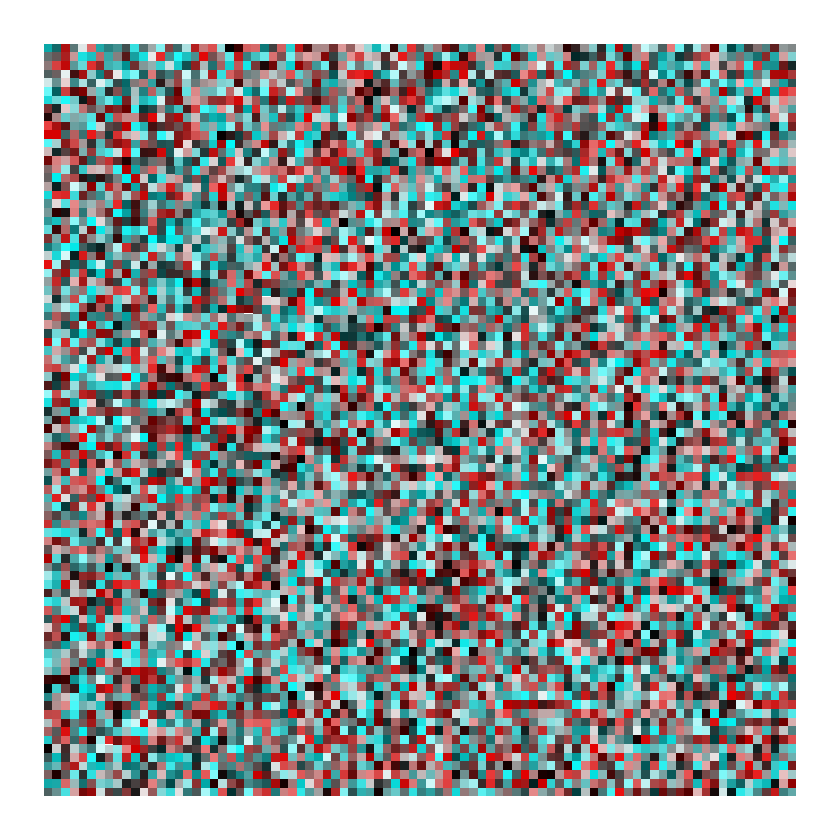

In [23]:
start.time <- Sys.time()
res <- treemap(dtf=exp_to_tree_map, index=c("geneId"), 
               vSize="tamPixel", vColor="colorGene", type="color", algorithm="pivotSize", sortID="ranOrder", 
               fontsize.labels=0, fontsize.title=0,
               border.lwds=0, position.legend="none", aspRatio=1, frame.plot=FALSE, draw=TRUE)
end.time <- Sys.time()

In [24]:
end.time - start.time

Time difference of 26,95878 secs

The output dataset corresponds to a continuous description of the generated treemap:

In [25]:
df_res_pix <- res$tm
head(df_res_pix)

geneId,vSize,vColor,stdErr,vColorValue,level,x0,y0,w,h,color
<fct>,<dbl>,<fct>,<dbl>,<lgl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000000003.14,1,#E78080,1,NA,1,"0,4278061","0,0232742","0,01144388","0,01163710",#E78080
ENSG00000000938.12,1,#044848,1,NA,1,"0,9313367","0,4305726","0,01144388","0,01163710",#044848
ENSG00000000971.15,1,#149898,1,NA,1,"0,5994643","0,1396452","0,01144388","0,01163710",#149898
ENSG00000001084.10,1,#C2D0D0,1,NA,1,"0,9312225","0,7679868","0,01146291","0,01161777",#C2D0D0
ENSG00000001461.16,1,#038080,1,NA,1,"0,1391147","0,2640002","0,01160223","0,01147827",#038080
ENSG00000001561.6,1,#C20808,1,NA,1,"0,5765765","0,4072984","0,01144388","0,01163710",#C20808


In [26]:
nrow(df_res_pix)

[1] 7509

We can check that all genes occupy approximately the same area in the generated treemap:

In [27]:
rect_area <- df_res_pix["w"] * df_res_pix["h"]

In [28]:
rect_area[1, ]

[1] 0,0001331735

In [29]:
# |min - max| ~= 0
abs(min(rect_area) - max(rect_area))

[1] 2,52077e-18

Finally, in the output dataset, we sort the genes by their position in the treemap:

In [30]:
df_res_pix <- df_res_pix[order(df_res_pix["y0"], df_res_pix["x0"], decreasing=FALSE), ]
head(df_res_pix)

,geneId,vSize,vColor,stdErr,vColorValue,level,x0,y0,w,h,color
,<fct>,<dbl>,<fct>,<dbl>,<lgl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1263,ENSG00000103995.13,1,#4D6060,1,NA,1,"0,00000000",0,"0,01158610","0,01149425",#4D6060
5593,ENSG00000173821.19,1,#689090,1,NA,1,"0,01158610",0,"0,01158719","0,01149317",#689090
3398,ENSG00000140057.8,1,#49E0E0,1,NA,1,"0,02317328",0,"0,01158831","0,01149205",#49E0E0
1288,ENSG00000104381.12,1,#D6A0A0,1,NA,1,"0,03476160",0,"0,01158948","0,01149089",#D6A0A0
7330,ENSG00000256771.2,1,#730808,1,NA,1,"0,04635108",0,"0,01159070","0,01148969",#730808
1028,ENSG00000100228.12,1,#960808,1,NA,1,"0,05794178",0,"0,01159195","0,01148845",#960808


In [31]:
# Check we have one distinct color for every gene
length(unique(df_res_pix$color)) == nrow(gene_color)

[1] TRUE

### Treemap discretization

In this subsection, we convert the template treemap into an image. To do so, we discretize the continuous treemap description given as the output dataset by the `treemap` package into a raster image in PNG format, setting the same image size as the resolution used in `2-KEGG_BRITE_Treemap` notebook.

Firstly, we generate a gene-expression data frame that will be used later to generate the different gene-expression images **R<sub>i</sub>**:

In [32]:
tcga_samples <- colnames(exp_to_tree_map)[grep("TCGA", colnames(exp_to_tree_map))]

In [33]:
gene_exp <- exp_to_tree_map[!duplicated(exp_to_tree_map[, "geneId"]), c("geneId", tcga_samples, "order")]

In [34]:
dim(gene_exp)

[1]  7509 10537

In [35]:
tail(gene_exp)

ERROR while rich displaying an object: Error in sprintf(wrap, caption, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]]

,geneId,TCGA.02.0047.01,TCGA.02.0055.01,TCGA.02.2483.01,TCGA.02.2485.01,TCGA.04.1331.01,TCGA.04.1332.01,TCGA.04.1337.01,TCGA.04.1338.01,TCGA.04.1341.01,⋯,TCGA.ZS.A9CD.01,TCGA.ZS.A9CE.01,TCGA.ZS.A9CF.01,TCGA.ZS.A9CF.02,TCGA.ZS.A9CG.01,TCGA.ZT.A8OM.01,TCGA.ZU.A8S4.01,TCGA.ZU.A8S4.11,TCGA.ZX.AA5X.01,order
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
18485,ENSG00000012817.15,"3,7614","-3,0469","2,7270","4,0019","-9,9658","-9,9658","-9,9658","-9,9658","-9,9658",⋯,"1,3051","-9,9658","3,2781","3,8491","2,2663","-5,5735","2,0289","1,8762","-9,9658","-2,9807250"
18489,ENSG00000198692.9,"4,6508","-4,0350","5,3042","4,8090","-9,9658","-9,9658","-9,9658","-9,9658","-9,9658",⋯,"4,4556","-9,9658","4,8802","5,0968","-0,0425","-9,9658","3,6405","3,9561","-9,9658","-2,4597650"
18491,ENSG00000105227.14,"1,2815","0,2881","-1,1172","0,9642","0,5955","3,4304","0,3231","-1,8836","-2,1779",⋯,"-0,4521","0,6969","-0,4325","0,7664","-0,1187","1,1316","0,5859","-1,8836","0,8246","0,6511954"
18492,ENSG00000164237.8,"4,3618","2,5924","3,5523","3,6635","4,3660","1,7995","1,7053","1,2516","0,5470",⋯,"5,2126","7,6705","6,7502","5,8888","6,5694","0,4233","4,0549","6,3338","1,0573","4,0465881"
18493,ENSG00000175048.16,"4,9426","2,9488","3,3450","3,9468","1,4547","1,9415","0,7233","0,6145","1,1447",⋯,"3,5584","2,3760","3,0740","2,4623","1,8564","1,5366","3,9232","2,8055","2,7826","2,5296664"
18494,ENSG00000188706.12,"5,7748","5,6056","4,8360","4,5571","5,1486","3,5098","5,0760","3,8187","3,0481",⋯,"5,2005","4,2366","3,6242","4,0713","5,1863","-0,3566","4,1612","3,6066","3,9829","4,5475844"


Background elements will be set to 0 values in gene-expression images, as there is no gene having 0 expression value in any sample:

In [36]:
start.time <- Sys.time()
exp_v <- unique(as.numeric(as.matrix(gene_exp[, c(tcga_samples, "order")])))
end.time <- Sys.time()

In [37]:
end.time - start.time

Time difference of 3,216726 secs

In [38]:
sum(exp_v == 0)

[1] 0

In [39]:
length(exp_v)

[1] 475188

In [40]:
exp_v <- exp_v[order(exp_v)]
w <- which(exp_v > 0)
exp_v[(w[1]-3):(w[1]+2)]

[1] -0,0014238489 -0,0014045903 -0,0001337805  0,0013981905  0,0014000000
[6]  0,0014005200

In [41]:
# Add last row representing background
gene_exp <- rbind(gene_exp, c(list("#FFFFFF"), as.list(rep(0, times = (ncol(gene_exp)-1)))))

In [42]:
dim(gene_exp)

[1]  7510 10537

In [43]:
rownames(gene_exp) <- gene_exp[, "geneId"]

In [44]:
tail(gene_exp)

ERROR while rich displaying an object: Error in sprintf(wrap, caption, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]]

,geneId,TCGA.02.0047.01,TCGA.02.0055.01,TCGA.02.2483.01,TCGA.02.2485.01,TCGA.04.1331.01,TCGA.04.1332.01,TCGA.04.1337.01,TCGA.04.1338.01,TCGA.04.1341.01,⋯,TCGA.ZS.A9CD.01,TCGA.ZS.A9CE.01,TCGA.ZS.A9CF.01,TCGA.ZS.A9CF.02,TCGA.ZS.A9CG.01,TCGA.ZT.A8OM.01,TCGA.ZU.A8S4.01,TCGA.ZU.A8S4.11,TCGA.ZX.AA5X.01,order
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000198692.9,ENSG00000198692.9,"4,6508","-4,0350","5,3042","4,8090","-9,9658","-9,9658","-9,9658","-9,9658","-9,9658",⋯,"4,4556","-9,9658","4,8802","5,0968","-0,0425","-9,9658","3,6405","3,9561","-9,9658","-2,4597650"
ENSG00000105227.14,ENSG00000105227.14,"1,2815","0,2881","-1,1172","0,9642","0,5955","3,4304","0,3231","-1,8836","-2,1779",⋯,"-0,4521","0,6969","-0,4325","0,7664","-0,1187","1,1316","0,5859","-1,8836","0,8246","0,6511954"
ENSG00000164237.8,ENSG00000164237.8,"4,3618","2,5924","3,5523","3,6635","4,3660","1,7995","1,7053","1,2516","0,5470",⋯,"5,2126","7,6705","6,7502","5,8888","6,5694","0,4233","4,0549","6,3338","1,0573","4,0465881"
ENSG00000175048.16,ENSG00000175048.16,"4,9426","2,9488","3,3450","3,9468","1,4547","1,9415","0,7233","0,6145","1,1447",⋯,"3,5584","2,3760","3,0740","2,4623","1,8564","1,5366","3,9232","2,8055","2,7826","2,5296664"
ENSG00000188706.12,ENSG00000188706.12,"5,7748","5,6056","4,8360","4,5571","5,1486","3,5098","5,0760","3,8187","3,0481",⋯,"5,2005","4,2366","3,6242","4,0713","5,1863","-0,3566","4,1612","3,6066","3,9829","4,5475844"
#FFFFFF,#FFFFFF,"0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000",⋯,"0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000000"


We now proceed to generate the template image:

In [69]:
library(grid)

In [70]:
n_width <- 175
n_height <- 175

img_path <- paste0("./random_GENE_COLOR_GRID_TREEMAP_", n_width, "_", n_height, "_seed_", rand_seed, ".png")

In [71]:
# Background is set to white (#FFFFFF in RRGGBB format)
png(filename = img_path, width = n_width, height = n_height, bg = "white")
# Same arguments values used in https://github.com/mtennekes/treemap/blob/master/pkg/R/createRec.R#L29
grid.rect(x = df_res_pix$x0, y = df_res_pix$y0, width = df_res_pix$w, df_res_pix$h, default.units = "npc",
          just=c("left","bottom"), gp = gpar(lwd=0, fill = df_res_pix$color))
dev.off()

png 
  2

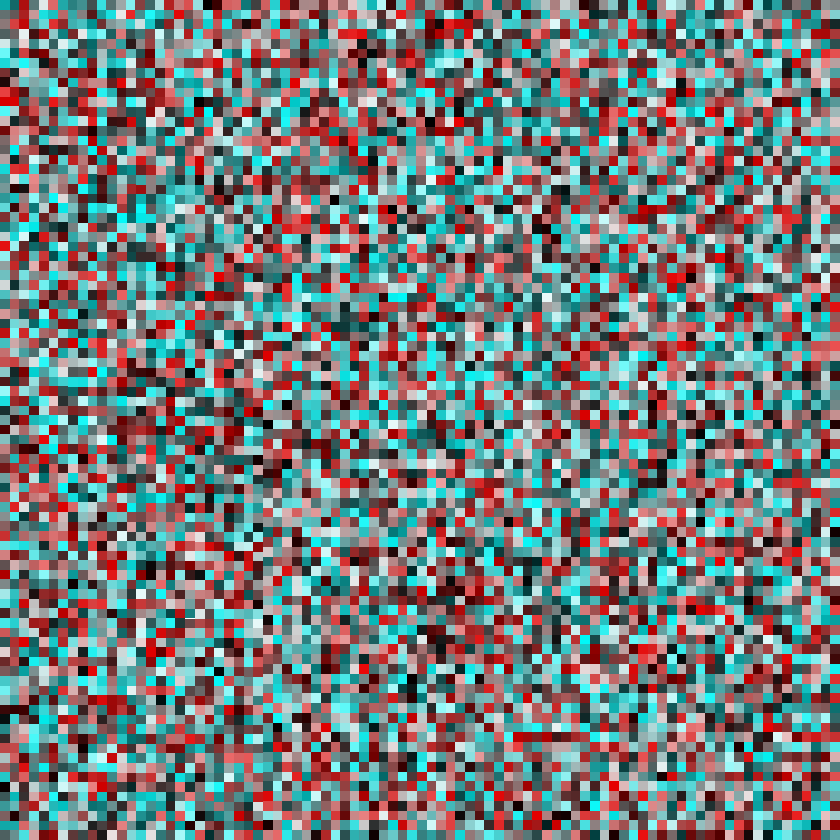

In [72]:
# Just for visualization purpose
grid.rect(x = df_res_pix$x0, y = df_res_pix$y0, width = df_res_pix$w, df_res_pix$h, default.units = "npc",
          just=c("left","bottom"), gp = gpar(lwd=0, fill = df_res_pix$color))

#### Colors to genes

Using the previously generated gene-color PNG image, we transform it to a matrix where each color is converted back to the gene it codes, in order to use the matrix as a template to generate the different gene-expression images.

Firstly, we load the gene-color image:

In [73]:
library(png)

In [74]:
png_mat <- readPNG(img_path)

In [75]:
(n_row <- dim(png_mat)[1])
(n_col <- dim(png_mat)[2])

[1] 175

[1] 175

In [76]:
head(png_mat[, , 1])

"0,03921569","0,03921569","0,0745098","0,0745098","0,6784314","0,6784314","0,3529412","0,3529412","0,8784314","0,8784314",⋯,"0,50980392","0,50980392","0,3019608","0,3019608","0,37254902","0,37254902","0,5607843","0,5607843","0,50588235","0,50588235"
"0,03921569","0,03921569","0,0745098","0,0745098","0,6784314","0,6784314","0,3529412","0,3529412","0,8784314","0,8784314",⋯,"0,50980392","0,50980392","0,3019608","0,3019608","0,37254902","0,37254902","0,5607843","0,5607843","0,50588235","0,50588235"
"0,38823529","0,38823529","0,3921569","0,3921569","0,6666667","0,6666667","0,7764706","0,7764706","0,1019608","0,1019608",⋯,"0,08627451","0,08627451","0,5450980","0,5450980","0,13725490","0,13725490","0,8156863","0,8156863","0,50588235","0,50588235"
"0,38823529","0,38823529","0,3921569","0,3921569","0,6666667","0,6666667","0,7764706","0,7764706","0,1019608","0,1019608",⋯,"0,08627451","0,08627451","0,5450980","0,5450980","0,13725490","0,13725490","0,8156863","0,8156863","0,50588235","0,50588235"
"0,54901961","0,54901961","0,8392157","0,8392157","0,7568627","0,7568627","0,3529412","0,3529412","0,4000000","0,4000000",⋯,"0,83137255","0,83137255","0,1411765","0,1411765","0,09019608","0,09019608","0,4117647","0,4117647","0,08235294","0,08235294"
"0,54901961","0,54901961","0,8392157","0,8392157","0,7568627","0,7568627","0,3529412","0,3529412","0,4000000","0,4000000",⋯,"0,83137255","0,83137255","0,1411765","0,1411765","0,09019608","0,09019608","0,4117647","0,4117647","0,08235294","0,08235294"


We convert pixels values from 0-1 to 0-255 scale:

In [77]:
png_mat <- png_mat*255

We extract RGB matrices:

In [78]:
r_png_mat <- png_mat[, , 1]
g_png_mat <- png_mat[, , 2]
b_png_mat <- png_mat[, , 3]

We convert RGB color values to hexadecimal format:

In [79]:
hex_r_png_mat <- format(as.hexmode(r_png_mat), width = 2, upper.case = TRUE)
hex_g_png_mat <- format(as.hexmode(g_png_mat), width = 2, upper.case = TRUE)
hex_b_png_mat <- format(as.hexmode(b_png_mat), width = 2, upper.case = TRUE)

G and B colors component were originally generated to be the same:

In [80]:
# TRUE expected
all(hex_g_png_mat == hex_b_png_mat)

[1] TRUE

In [81]:
# FALSE expected
all(hex_r_png_mat == hex_g_png_mat)

[1] FALSE

We create RRGGBB (hexadecimal format) color value matrix:

In [82]:
hex_rgb_png_mat <- paste0("#", hex_r_png_mat, hex_g_png_mat, hex_b_png_mat)

In [83]:
head(hex_rgb_png_mat)

[1] "#0AA8A8" "#0AA8A8" "#637070" "#637070" "#8C7878" "#8C7878"

The discretized RRGGBB matrix contains one extra color (white background):

In [84]:
length(unique(hex_rgb_png_mat))

[1] 7510

In [85]:
(back_col <- setdiff(unique(hex_rgb_png_mat), unique(df_res_pix$color)))

[1] "#FFFFFF"

We now create a color-gene mapping table, adding background color as the last row:

In [86]:
color_gene <- data.frame(geneId = c(rownames(gene_color), back_col), stringsAsFactors = FALSE)
rownames(color_gene) <- c(gene_color$color, back_col)

In [87]:
tail(color_gene)

,geneId
,<chr>
#EA8080,ENSG00000198692.9
#EA8888,ENSG00000105227.14
#EA9090,ENSG00000164237.8
#EA9898,ENSG00000175048.16
#EAA0A0,ENSG00000188706.12
#FFFFFF,#FFFFFF


Finally, we create the template matrix, mapping the colors from the RRGGBB color value matrix to genes:

In [88]:
gene_treemap <- matrix(color_gene[hex_rgb_png_mat, "geneId"], nrow = n_row, ncol = n_col, byrow = FALSE)

The template matrix also contains one extra color corresponding to background:

In [89]:
length(unique(as.character(gene_treemap)))

[1] 7510

In [90]:
setdiff(unique(as.character(gene_treemap)), gene)

[1] "#FFFFFF"

In [91]:
back_pos <- which(gene_treemap=="#FFFFFF", arr.ind = TRUE)
back_pos[order(back_pos[, "row"], back_pos[, "col"]), ]

row,col
23,61
24,61
25,57
26,57


In [92]:
head(gene_treemap)

ENSG00000117600.12,ENSG00000117600.12,ENSG00000116147.16,ENSG00000116147.16,ENSG00000155016.17,ENSG00000155016.17,ENSG00000178573.6,ENSG00000178573.6,ENSG00000106976.18,ENSG00000106976.18,⋯,ENSG00000169604.19,ENSG00000169604.19,ENSG00000140284.10,ENSG00000140284.10,ENSG00000108602.17,ENSG00000108602.17,ENSG00000170369.3,ENSG00000170369.3,ENSG00000171132.13,ENSG00000171132.13
ENSG00000117600.12,ENSG00000117600.12,ENSG00000116147.16,ENSG00000116147.16,ENSG00000155016.17,ENSG00000155016.17,ENSG00000178573.6,ENSG00000178573.6,ENSG00000106976.18,ENSG00000106976.18,⋯,ENSG00000169604.19,ENSG00000169604.19,ENSG00000140284.10,ENSG00000140284.10,ENSG00000108602.17,ENSG00000108602.17,ENSG00000170369.3,ENSG00000170369.3,ENSG00000171132.13,ENSG00000171132.13
ENSG00000073670.13,ENSG00000073670.13,ENSG00000170703.15,ENSG00000170703.15,ENSG00000196620.8,ENSG00000196620.8,ENSG00000178199.13,ENSG00000178199.13,ENSG00000152463.14,ENSG00000152463.14,⋯,ENSG00000136634.5,ENSG00000136634.5,ENSG00000144583.4,ENSG00000144583.4,ENSG00000130598.15,ENSG00000130598.15,ENSG00000221866.9,ENSG00000221866.9,ENSG00000179915.20,ENSG00000179915.20
ENSG00000073670.13,ENSG00000073670.13,ENSG00000170703.15,ENSG00000170703.15,ENSG00000196620.8,ENSG00000196620.8,ENSG00000178199.13,ENSG00000178199.13,ENSG00000152463.14,ENSG00000152463.14,⋯,ENSG00000136634.5,ENSG00000136634.5,ENSG00000144583.4,ENSG00000144583.4,ENSG00000130598.15,ENSG00000130598.15,ENSG00000221866.9,ENSG00000221866.9,ENSG00000179915.20,ENSG00000179915.20
ENSG00000115009.11,ENSG00000115009.11,ENSG00000270024.5,ENSG00000270024.5,ENSG00000112164.5,ENSG00000112164.5,ENSG00000166473.16,ENSG00000166473.16,ENSG00000123700.4,ENSG00000123700.4,⋯,ENSG00000221818.8,ENSG00000221818.8,ENSG00000110148.9,ENSG00000110148.9,ENSG00000196482.16,ENSG00000196482.16,ENSG00000181408.3,ENSG00000181408.3,ENSG00000163435.15,ENSG00000163435.15
ENSG00000115009.11,ENSG00000115009.11,ENSG00000270024.5,ENSG00000270024.5,ENSG00000112164.5,ENSG00000112164.5,ENSG00000166473.16,ENSG00000166473.16,ENSG00000123700.4,ENSG00000123700.4,⋯,ENSG00000221818.8,ENSG00000221818.8,ENSG00000110148.9,ENSG00000110148.9,ENSG00000196482.16,ENSG00000196482.16,ENSG00000181408.3,ENSG00000181408.3,ENSG00000163435.15,ENSG00000163435.15


## Gene-expression images

Once we have generated the template image, we proceed to create the gene-expression images. For each gene-expression vector **g<sub>i</sub>**, we map the expression values to the positions
of the genes in the template, thus obtaining a unique gene-expression image **R<sub>i</sub>** for each sample *i*. 

We save each **R<sub>i</sub>** image as a *numpy* file, using the sample ID as the file name:

In [93]:
library(RcppCNPy)

In [46]:
# Create gene-expression images folder
dir_name <- paste0("random_gene_exp_treemap_", n_width, "_", n_height, "_seed_", rand_seed, "_npy/") 
system(paste0("mkdir -p ", dir_name), intern = TRUE)

character(0)

In [95]:
start.time <- Sys.time()
for (sample_id in tcga_samples) {
    npySave(filename = paste0(dir_name, strsplit(head(sample_id)[1], "_")[[1]][1], ".npy"), 
                              strsplit(head(sample_id)[1], "_")[[1]][1], ".npy"), 
            object = matrix(gene_exp[gene_treemap, sample_id], nrow = n_row, ncol = n_col, byrow = FALSE))
}
end.time <- Sys.time()

In [96]:
end.time - start.time

Time difference of 15,07208 secs